#Question 1

##Part 1

In [63]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
if os.path.exists('anneal_names.txt'):
    print("Already Present")
else:
    os.system("wget https://www.dropbox.com/s/19mhsoklyptg08c/anneal.names")
    os.system("mv anneal.names anneal_names.txt")

In [3]:
with open('anneal_names.txt',"r") as file:
    content=file.read()
    print(content)

1. Title of Database: Annealing Data

2. Source Information: donated by David Sterling and Wray Buntine.

3. Past Usage: unknown

4. Relevant Information:
   -- Explanation: I suspect this was left by Ross Quinlan in 1987 at the
      4th Machine Learning Workshop.  I'd have to check with Jeff Schlimmer
      to double check this.

5. Number of Instances: 798

6. Number of Attributes: 38
   -- 6 continuously-valued
   -- 3 integer-valued
   -- 29 nominal-valued

7. Attribute Information:
    1. family:		--,GB,GK,GS,TN,ZA,ZF,ZH,ZM,ZS
    2. product-type:	C, H, G
    3. steel:		-,R,A,U,K,M,S,W,V
    4. carbon:		continuous
    5. hardness:	continuous
    6. temper_rolling:	-,T
    7. condition:	-,S,A,X
    8. formability:	-,1,2,3,4,5
    9. strength:	continuous
   10. non-ageing:	-,N
   11. surface-finish:	P,M,-
   12. surface-quality: -,D,E,F,G
   13. enamelability:	-,1,2,3,4,5
   14. bc:		Y,-
   15. bf:		Y,-
   16. bt:		Y,-
   17. bw/me:		B,M,-
   18. bl:		Y,-
   19. m:		Y,-
   20. chro

In [4]:
features= ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing','classes']

In [5]:
if os.path.exists('anneal.csv'):
    print("Already Present")
else:
    os.system("wget https://www.dropbox.com/s/pi58n517txfri3j/anneal.data")
    os.system("mv anneal.data anneal.csv")

In [6]:
df=pd.read_csv("anneal.csv",names=features)

In [7]:
if os.path.exists('anneal_test.csv'):
    print("Already Present")
else:
    os.system("wget https://www.dropbox.com/s/g28k7w2sb4769rs/anneal.test")
    os.system("mv anneal.test anneal_test.csv")

In [8]:
df_test=pd.read_csv("anneal_test.csv",names=features)

##Part 2

In [9]:
df.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [10]:
#Converting ? to NA
df = df.replace('?', pd.NA)
df_test = df_test.replace('?', pd.NA)

In [11]:
df.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,<NA>,C,A,8,0,<NA>,S,<NA>,0,<NA>,...,<NA>,<NA>,COIL,0.700,610.0,0,<NA>,0,<NA>,3
1,<NA>,C,R,0,0,<NA>,S,2,0,<NA>,...,<NA>,<NA>,COIL,3.200,610.0,0,<NA>,0,<NA>,3
2,<NA>,C,R,0,0,<NA>,S,2,0,<NA>,...,<NA>,<NA>,SHEET,0.700,1300.0,762,<NA>,0,<NA>,3
3,<NA>,C,A,0,60,T,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,COIL,2.801,385.1,0,<NA>,0,<NA>,3
4,<NA>,C,A,0,60,T,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,SHEET,0.801,255.0,269,<NA>,0,<NA>,3


In [12]:
df.isnull().sum()

family                    687
product-type                0
steel                      70
carbon                      0
hardness                    0
temper_rolling            675
condition                 271
formability               283
strength                    0
non-ageing                703
surface-finish            790
surface-quality           217
enamelability             785
bc                        797
bf                        680
bt                        736
bw/me                     609
bl                        662
m                         798
chrom                     775
phos                      791
cbond                     730
marvi                     798
exptl                     796
ferro                     772
corr                      798
blue/bright/varn/clean    793
lustre                    753
jurofm                    798
s                         798
p                         798
shape                       0
thick                       0
width     

In [13]:
#Dropping columns which has NA value count greater than the number of examples * 0.8 in df
dfthreshold = len(df) * 0.8
df.dropna(thresh=dfthreshold, axis=1, inplace=True)

# df_testthreshold = len(df) * 0.95
# df_test.dropna(thresh=df_testthreshold, axis=1, inplace=True)

In [14]:
df.dropna(how='any', inplace=True)
# df_test.dropna(how='any', inplace=True)

In [15]:
df

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
792,C,R,0,0,0,COIL,0.900,966.0,0,0,3
793,C,A,0,50,0,COIL,1.001,50.0,0,0,3
795,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [16]:
df.isnull().sum()

product-type    0
steel           0
carbon          0
hardness        0
strength        0
shape           0
thick           0
width           0
len             0
bore            0
classes         0
dtype: int64

In [17]:
df.describe()

,carbon,hardness,strength,thick,width,len,bore
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,3.888736,11.888736,29.010989,1.204891,786.399725,1285.759615,30.082418
std,14.185254,24.858001,111.501494,0.864335,403.715046,1899.422370,128.643302
min,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.699000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.800000,610.000000,611.000000,0.000000
75%,0.000000,0.000000,0.000000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,700.000000,4.000000,1525.000000,4880.000000,600.000000


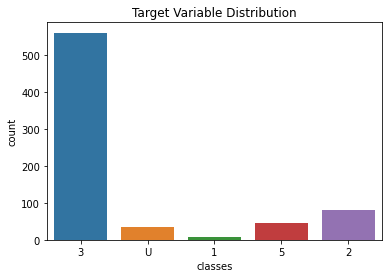

In [18]:
#Countplot for df
sns.countplot(x="classes", data=df)
plt.title("Target Variable Distribution")
plt.show()

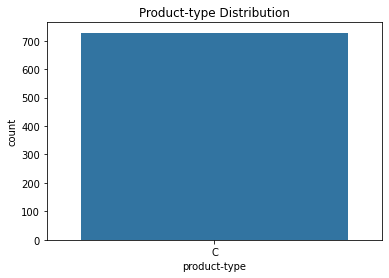

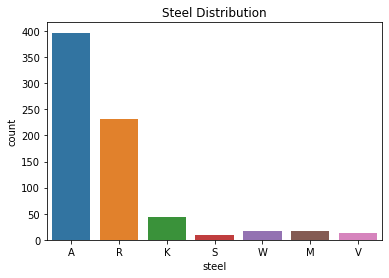

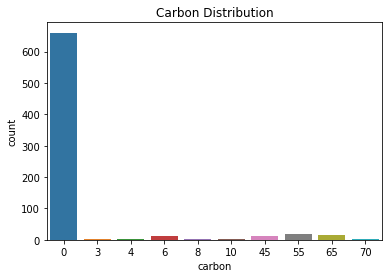

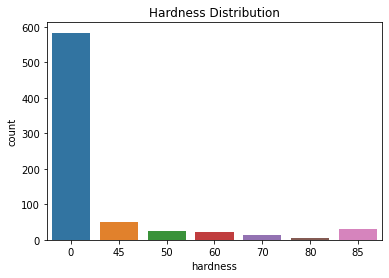

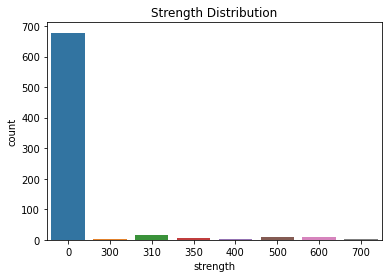

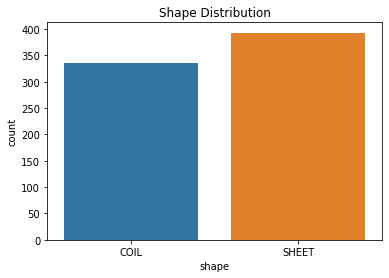

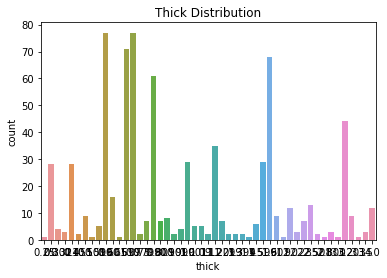

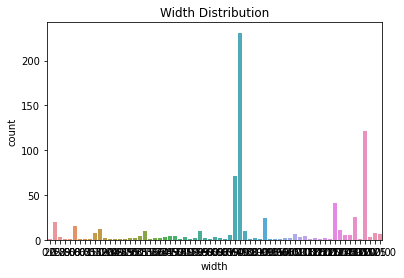

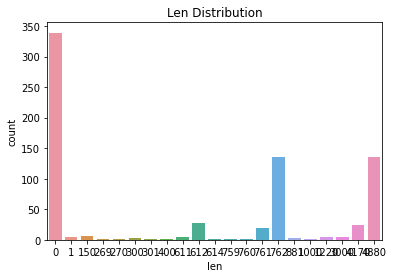

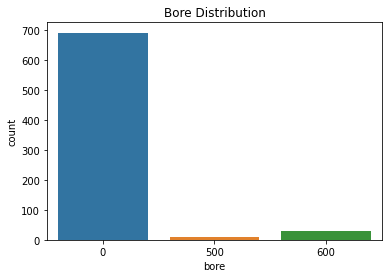

In [19]:
#Countplot for every feature
for feature in df.columns:
    if feature != 'classes':
        plt.figure()
        sns.countplot(x=feature, data=df)
        plt.title(f"{feature.capitalize()} Distribution")
        plt.show()

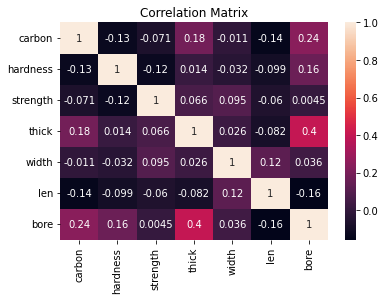

In [20]:
#Correlation heat map
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [21]:
#Categorical Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['product-type'] = encoder.fit_transform(df['product-type'])
df['steel'] = encoder.fit_transform(df['steel'])
df['shape'] = encoder.fit_transform(df['shape'])
df['classes'] = encoder.fit_transform(df['classes'])

In [22]:
df

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,0,0,8,0,0,0,0.700,610.0,0,0,2
1,0,3,0,0,0,0,3.200,610.0,0,0,2
2,0,3,0,0,0,1,0.700,1300.0,762,0,2
3,0,0,0,60,0,0,2.801,385.1,0,0,2
4,0,0,0,60,0,1,0.801,255.0,269,0,2
...,...,...,...,...,...,...,...,...,...,...,...
792,0,3,0,0,0,0,0.900,966.0,0,0,2
793,0,0,0,50,0,0,1.001,50.0,0,0,2
795,0,0,0,0,0,0,0.400,609.9,0,0,2
796,0,0,0,0,0,1,3.200,610.0,4880,0,2


In [23]:
df.describe()

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
count,728.0,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,0.0,1.337912,3.888736,11.888736,29.010989,0.539835,1.204891,786.399725,1285.759615,30.082418,2.021978
std,0.0,1.645666,14.185254,24.858001,111.501494,0.498753,0.864335,403.715046,1899.422370,128.643302,0.635545
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.699000,609.900000,0.000000,0.000000,2.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.800000,610.000000,611.000000,0.000000,2.000000
75%,0.0,3.000000,0.000000,0.000000,0.000000,1.000000,1.600000,1250.000000,762.000000,0.000000,2.000000
max,0.0,6.000000,70.000000,85.000000,700.000000,1.000000,4.000000,1525.000000,4880.000000,600.000000,4.000000


Removing product count as it has 0 std

In [24]:
df=df.drop(('product-type'),axis=1)

In [25]:
#df to X,y
X = df.drop("classes", axis=1)
y = df["classes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)

In [26]:
X_preserved=X
# unfe stands for not standard featurised dataset
X_train_unfe=X_train
X_test_unfe=X_test
X_unfe=X
#Feature Standardization
scaler = StandardScaler()
X=scaler.fit_transform(X)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train_temp = pd.DataFrame(X_train, columns=X_preserved.columns)
X_test_temp = pd.DataFrame(X_test, columns=X_preserved.columns)

In [28]:
X_train_temp.describe()

,steel,carbon,hardness,strength,shape,thick,width,len,bore
count,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02
mean,5.633267e-18,6.759920e-17,4.694389e-17,-4.882165e-17,3.168713e-17,-1.915311e-16,-3.333016e-16,3.004409e-17,1.502205e-17
std,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00
min,-7.913002e-01,-2.709757e-01,-4.898421e-01,-2.621487e-01,-1.076948e+00,-1.106847e+00,-1.962360e+00,-6.665366e-01,-2.148448e-01
25%,-7.913002e-01,-2.709757e-01,-4.898421e-01,-2.621487e-01,-1.076948e+00,-5.900023e-01,-4.397538e-01,-6.665366e-01,-2.148448e-01
50%,-7.913002e-01,-2.709757e-01,-4.898421e-01,-2.621487e-01,9.285498e-01,-4.737409e-01,-4.395042e-01,-3.407252e-01,-2.148448e-01
75%,1.058543e+00,-2.709757e-01,-4.898421e-01,-2.621487e-01,9.285498e-01,4.471414e-01,1.083351e+00,-2.602056e-01,-2.148448e-01
max,2.908387e+00,4.683196e+00,2.914497e+00,5.761267e+00,9.285498e-01,3.209788e+00,1.844779e+00,1.935688e+00,4.866235e+00


##Part 3

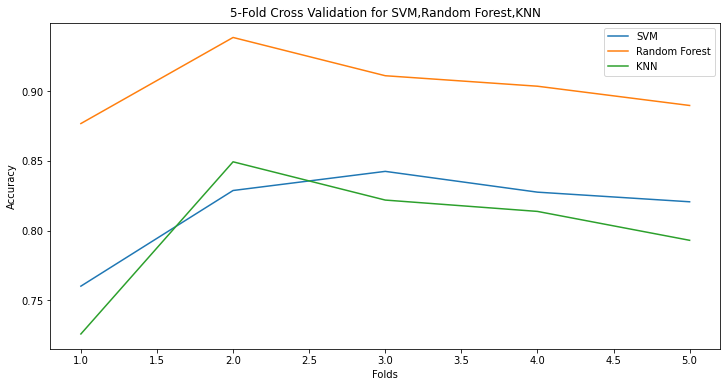

5fold_cv for SVM 0.8159565422768068
5fold_cv for Random Forest 0.9038261691072271
5fold_cv for KNN 0.8008313651393483


In [29]:
#For feature standardization X

# Classifiers
svm = SVC()
random = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)

# 5fold_cv
cv_score_svm = cross_val_score(svm, X, y, cv=5)
cv_score_random = cross_val_score(random, X, y, cv=5)
cv_score_knn = cross_val_score(knn, X, y, cv=5)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot([1,2,3,4,5], cv_score_svm, label='SVM')
plt.plot([1,2,3,4,5], cv_score_random, label='Random Forest')
plt.plot([1,2,3,4,5], cv_score_knn, label='KNN')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation for SVM,Random Forest,KNN')
plt.legend()
plt.show()

print("5fold_cv for SVM",np.mean(cv_score_svm ))
print("5fold_cv for Random Forest",np.mean(cv_score_random))
print("5fold_cv for KNN",np.mean(cv_score_knn) )

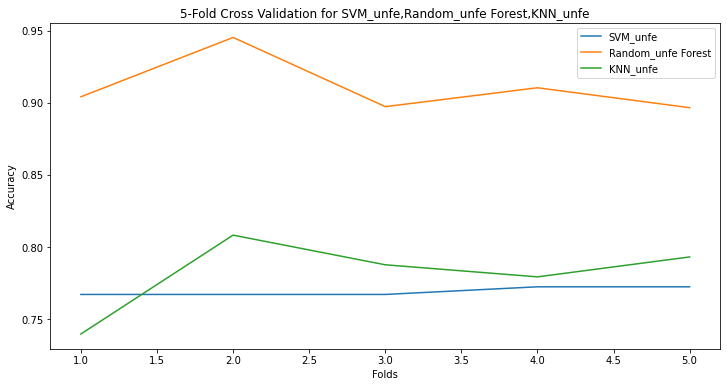

5fold_cv for SVM_unfe 0.769239489844119
5fold_cv for Random_unfe Forest 0.9106943788379784
5fold_cv for KNN_unfe 0.7816060462919225


In [30]:
#For not feature standardization X_unfe

# Classifiers
svm_unfe = SVC()
random_unfe = RandomForestClassifier(n_estimators=100)
knn_unfe = KNeighborsClassifier(n_neighbors=5)

# 5fold_cv
cv_score_svm_unfe = cross_val_score(svm_unfe, X_unfe, y, cv=5)
cv_score_random_unfe = cross_val_score(random_unfe, X_unfe, y, cv=5)
cv_score_knn_unfe = cross_val_score(knn_unfe, X_unfe, y, cv=5)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot([1,2,3,4,5], cv_score_svm_unfe, label='SVM_unfe')
plt.plot([1,2,3,4,5], cv_score_random_unfe, label='Random_unfe Forest')
plt.plot([1,2,3,4,5], cv_score_knn_unfe, label='KNN_unfe')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation for SVM_unfe,Random_unfe Forest,KNN_unfe')
plt.legend()
plt.show()

print("5fold_cv for SVM_unfe",np.mean(cv_score_svm_unfe ))
print("5fold_cv for Random_unfe Forest",np.mean(cv_score_random_unfe))
print("5fold_cv for KNN_unfe",np.mean(cv_score_knn_unfe) )

The target column 'classes' is categorical, so this is a supervised classifier, we have moderate amount of rows and columns. So using Random Forest and KNN is a good choice

##Part 4

In [31]:
from sklearn.decomposition import PCA
import copy
import numpy as np
import scipy
class PCA_scratch:
    def __init__(self, n_components=None):
        self.dim_features=None
        self.num_samples=None
        self.mean=None
        self.std=None
        self.cov=None
        self.eig_values=None
        self.eig_vectors=None
        self.principal_components=None
        self.X_transformed=None
        self.n_components = n_components
        self.des_sorted_ind=None

    def fit(self,X):
        self.dim_features=X.shape[1]
        self.num_samples=X.shape[0]
        self.mean,self.cov=self.covariance_scratch(X)
        self.std = np.sqrt(np.diag(self.cov))
        # self.std=self.std + np.full_like(self.std, 0.0001) #adding 0.0001 to make it non-zero
        X_centered=X-self.mean.T
        X_centered=X_centered/self.std
        _,self.cov=self.covariance_scratch(X_centered)
        # print("mean,std",self.mean,self.std)
        # print("X,X_centered",X,X_centered)
        self.X_transformed=copy.deepcopy(X_centered)
        self.eig_values,self.eig_vectors=self.eigenvalues_scratch(X_centered,self.cov)
        self.principal_components=self.principal_components_scratch(X_centered,self.eig_values,self.eig_vectors)

    def covariance_scratch(self,X):
        mean=[]

        for i in range(self.dim_features):
            sum=0
            for j in range(self.num_samples):
                sum+=X[j][i]
            mean.append(sum/self.num_samples)
        cov=[]

        for i in range(self.dim_features):
            row_cov=[]
            for j in range(self.dim_features):
                sum=0
                for k in range(self.num_samples):
                    sum+=(X[k][i]-mean[i])*(X[k][j]-mean[j])
                row_cov.append((sum)/(self.num_samples-1))
            cov.append(row_cov)

        # print(np.array(mean).shape)
        return np.array(mean),np.array(cov)

    def eigenvalues_scratch(self,X,cov):
        #For finding eigen_vectors
        _,eigenvectors=np.linalg.eig(cov)

        eigenvalues = []
        for i in range(eigenvectors.shape[1]):
            eig_val = (eigenvectors[:, i].T @ cov @ eigenvectors[:, i]).real
            # print("eig_val",eig_val)
            eigenvalues.append(eig_val)
        return np.array(eigenvalues),eigenvectors
    
    def principal_components_scratch(self,X_centered,eig_values,eig_vectors):
        des_sort_index = np.argsort(eig_values)[::-1]
        self.eig_values=eig_values = eig_values[des_sort_index]
        self.eig_vectors_new=eig_vectors_new = eig_vectors[:, des_sort_index]
        if self.n_components is not None:
            eig_vectors_new = eig_vectors_new[:, :self.n_components]
            eig_values_new=eig_values[:self.n_components]
            self.mean=self.mean[des_sort_index]
            self.des_sorted_ind=des_sort_index
            # self.=self.mean[des_sort_index]
            self.eig_values=eig_values_new
            self.eig_vectors=eig_vectors_new

        # print("shaper",X_centered,eig_vectors)
        # print((X_centered@eig_vectors))
        principal_components = (X_centered@eig_vectors)[:,des_sort_index]
        if self.n_components is not None:
            # print(principal_components.shape)
            # print(principal_components)
            principal_components=(principal_components)[:,:self.n_components]
            # print(principal_components)
        return principal_components




##Part 5

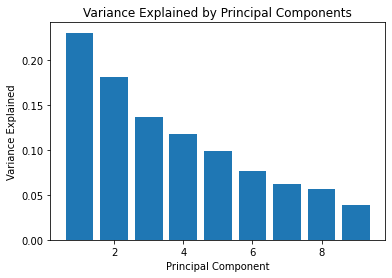

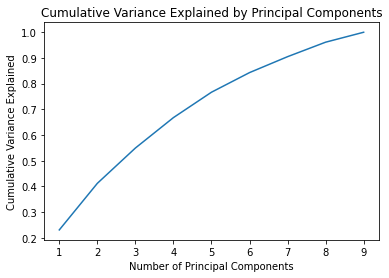

In [32]:
#For feature standardization X

pca = PCA_scratch()
pca.fit(X)

# variance explained
variance = pca.eig_values / np.sum(pca.eig_values)

cumulative_variance = np.cumsum(variance)

# Plotting var
plt.bar(range(1, len(variance)+1), variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

# Plotting cum_var
plt.plot(range(1, len(variance)+1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


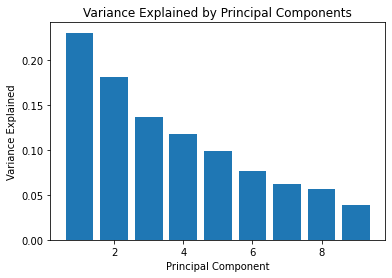

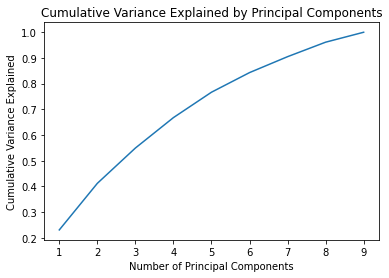

In [33]:
#For not feature standardization X_unfe

pca = PCA_scratch()
pca.fit(X_unfe.values)

# variance explained
variance = pca.eig_values / np.sum(pca.eig_values)

cumulative_variance = np.cumsum(variance)

# Plotting var
plt.bar(range(1, len(variance)+1), variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

# Plotting cum_var
plt.plot(range(1, len(variance)+1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


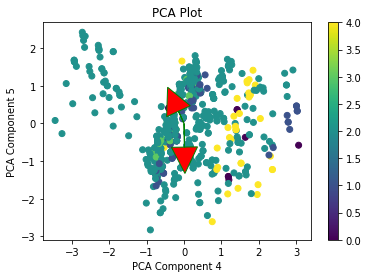

In [34]:
#For feature standardization X

pca = PCA_scratch(5)
pca.fit(X)

principal_components = pca.principal_components
eigenvectors = pca.eig_vectors
eigenvalues = pca.eig_values

# Choosing two features
x1_feature = 3
x2_feature = 4


# Plotting eigenvectors
mean_x1 = pca.mean[x1_feature]
mean_x2 = pca.mean[x2_feature]
# print(eigenvectors)
plt.scatter(principal_components[:, x1_feature], principal_components[:, x2_feature], c=y)
plt.colorbar()
plt.arrow(0, 0, eigenvectors[0,x1_feature]*eigenvalues[x1_feature], eigenvectors[1,x1_feature]*eigenvalues[x1_feature], head_width=0.7, head_length=0.7, fc='r', ec='g')
plt.arrow(0, 0, eigenvectors[0,x2_feature]*eigenvalues[x2_feature], eigenvectors[1,x2_feature]*eigenvalues[x2_feature], head_width=0.7, head_length=0.7, fc='r', ec='g')


plt.xlabel('PCA Component {}'.format(x1_feature+1))
plt.ylabel('PCA Component {}'.format(x2_feature+1))
plt.title('PCA Plot')

plt.show()


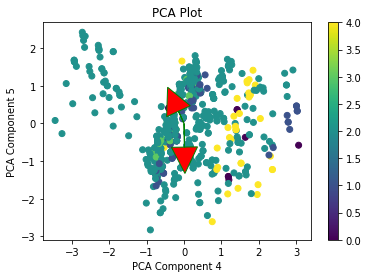

In [35]:
#For not feature standardization X_unfe

pca = PCA_scratch(5)
pca.fit(X_unfe.values)

principal_components = pca.principal_components
eigenvectors = pca.eig_vectors
eigenvalues = pca.eig_values

# Choosing two features
x1_feature = 3
x2_feature = 4


# Plotting eigenvectors
mean_x1 = pca.mean[x1_feature]
mean_x2 = pca.mean[x2_feature]
# print(eigenvectors)
plt.scatter(principal_components[:, x1_feature], principal_components[:, x2_feature], c=y)
plt.colorbar()
plt.arrow(0, 0, eigenvectors[0,x1_feature]*eigenvalues[x1_feature], eigenvectors[1,x1_feature]*eigenvalues[x1_feature], head_width=0.7, head_length=0.7, fc='r', ec='g')
plt.arrow(0, 0, eigenvectors[0,x2_feature]*eigenvalues[x2_feature], eigenvectors[1,x2_feature]*eigenvalues[x2_feature], head_width=0.7, head_length=0.7, fc='r', ec='g')


plt.xlabel('PCA Component {}'.format(x1_feature+1))
plt.ylabel('PCA Component {}'.format(x2_feature+1))
plt.title('PCA Plot')

plt.show()

In [36]:
X.shape

(728, 9)

##Part 6

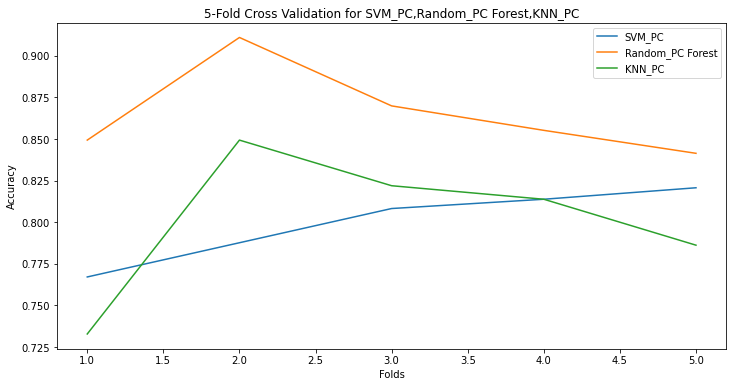

5fold_cv for SVM_PC 0.7994992914501653
5fold_cv for Random_PC Forest 0.8653377420878602
5fold_cv for KNN_PC 0.8008313651393483


In [37]:
#For Principal Component

# Classifiers
svm_PC = SVC()
random_PC = RandomForestClassifier(n_estimators=100)
knn_PC = KNeighborsClassifier(n_neighbors=5)

# 5fold_cv
cv_score_svm_PC = cross_val_score(svm_PC,principal_components, y, cv=5)
cv_score_random_PC = cross_val_score(random_PC,principal_components, y, cv=5)
cv_score_knn_PC = cross_val_score(knn_PC,principal_components, y, cv=5)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot([1,2,3,4,5], cv_score_svm_PC, label='SVM_PC')
plt.plot([1,2,3,4,5], cv_score_random_PC, label='Random_PC Forest')
plt.plot([1,2,3,4,5], cv_score_knn_PC, label='KNN_PC')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation for SVM_PC,Random_PC Forest,KNN_PC')
plt.legend()
plt.show()

print("5fold_cv for SVM_PC",np.mean(cv_score_svm_PC ))
print("5fold_cv for Random_PC Forest",np.mean(cv_score_random_PC))
print("5fold_cv for KNN_PC",np.mean(cv_score_knn) )

In [38]:
#For Feature Standarised X

svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

random.fit(X_train, y_train)
random_pred = random.predict(X_test)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Accuracy
svm_acc = accuracy_score(y_test, svm_pred)
random_acc = accuracy_score(y_test, random_pred)
knn_acc = accuracy_score(y_test, knn_pred)

# Precision
svm_prec = precision_score(y_test, svm_pred, average='weighted')
random_prec = precision_score(y_test, random_pred, average='weighted')
knn_prec = precision_score(y_test, knn_pred, average='weighted')

# Recall
svm_recall = recall_score(y_test, svm_pred, average='weighted')
random_recall = recall_score(y_test, random_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')

# F1-score
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
random_f1 = f1_score(y_test, random_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

print("Accuracy:")
print("SVM:", svm_acc)
print("Random Forest:", random_acc)
print("KNN:", knn_acc)
print()

print("Precision:")
print("SVM:", svm_prec)
print("Random Forest:", random_prec)
print("KNN:", knn_prec)
print()

print("Recall:")
print("SVM:", svm_recall)
print("Random Forest:", random_recall)
print("KNN:", knn_recall)
print()

print("F1-score:")
print("SVM:", svm_f1)
print("Random Forest:", random_f1)
print("KNN:", knn_f1)


Accuracy:
SVM: 0.8235294117647058
Random Forest: 0.8862745098039215
KNN: 0.7843137254901961

Precision:
SVM: 0.7639354748991795
Random Forest: 0.8920809290531577
KNN: 0.7622463274034587

Recall:
SVM: 0.8235294117647058
Random Forest: 0.8862745098039215
KNN: 0.7843137254901961

F1-score:
SVM: 0.7762194622628634
Random Forest: 0.8877465024144812
KNN: 0.7590840173641967


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
X_train_unfe, X_test_unfe, y_train_unfe, y_test_unfe = train_test_split(X_unfe, y, test_size=0.35, stratify=y, random_state=42)

In [40]:
#For not Feature Standarised X_unfe

svm.fit(X_train_unfe, y_train_unfe)
svm_pred = svm.predict(X_test_unfe)

random.fit(X_train_unfe, y_train_unfe)
random_pred = random.predict(X_test_unfe)

knn.fit(X_train_unfe, y_train_unfe)
knn_pred = knn.predict(X_test_unfe)

# Accuracy
svm_acc = accuracy_score(y_test_unfe, svm_pred)
random_acc = accuracy_score(y_test_unfe, random_pred)
knn_acc = accuracy_score(y_test_unfe, knn_pred)

# Precision
svm_prec = precision_score(y_test_unfe, svm_pred, average='weighted')
random_prec = precision_score(y_test_unfe, random_pred, average='weighted')
knn_prec = precision_score(y_test_unfe, knn_pred, average='weighted')

# Recall
svm_recall = recall_score(y_test_unfe, svm_pred, average='weighted')
random_recall = recall_score(y_test_unfe, random_pred, average='weighted')
knn_recall = recall_score(y_test_unfe, knn_pred, average='weighted')

# F1-score
svm_f1 = f1_score(y_test_unfe, svm_pred, average='weighted')
random_f1 = f1_score(y_test_unfe, random_pred, average='weighted')
knn_f1 = f1_score(y_test_unfe, knn_pred, average='weighted')

print("Accuracy:")
print("SVM:", svm_acc)
print("Random Forest:", random_acc)
print("KNN:", knn_acc)
print()

print("Precision:")
print("SVM:", svm_prec)
print("Random Forest:", random_prec)
print("KNN:", knn_prec)
print()

print("Recall:")
print("SVM:", svm_recall)
print("Random Forest:", random_recall)
print("KNN:", knn_recall)
print()

print("F1-score:")
print("SVM:", svm_f1)
print("Random Forest:", random_f1)
print("KNN:", knn_f1)


Accuracy:
SVM: 0.7686274509803922
Random Forest: 0.8901960784313725
KNN: 0.7411764705882353

Precision:
SVM: 0.5907881584006152
Random Forest: 0.8934763817629824
KNN: 0.717240223836876

Recall:
SVM: 0.7686274509803922
Random Forest: 0.8901960784313725
KNN: 0.7411764705882353

F1-score:
SVM: 0.6680753010738664
Random Forest: 0.8912039114156413
KNN: 0.7200654913227593


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
X_train_PC, X_test_PC, y_train_PC, y_test_PC = train_test_split(principal_components, y, test_size=0.35, stratify=y, random_state=42)

In [42]:
#For Principal Components

svm.fit(X_train_PC, y_train_PC)
svm_pred = svm.predict(X_test_PC)

random.fit(X_train_PC, y_train_PC)
random_pred = random.predict(X_test_PC)

knn.fit(X_train_PC, y_train_PC)
knn_pred = knn.predict(X_test_PC)

# Accuracy
svm_acc = accuracy_score(y_test_PC, svm_pred)
random_acc = accuracy_score(y_test_PC, random_pred)
knn_acc = accuracy_score(y_test_PC, knn_pred)

# Precision
svm_prec = precision_score(y_test_PC, svm_pred, average='weighted')
random_prec = precision_score(y_test_PC, random_pred, average='weighted')
knn_prec = precision_score(y_test_PC, knn_pred, average='weighted')

# Recall
svm_recall = recall_score(y_test_PC, svm_pred, average='weighted')
random_recall = recall_score(y_test_PC, random_pred, average='weighted')
knn_recall = recall_score(y_test_PC, knn_pred, average='weighted')

# F1-score
svm_f1 = f1_score(y_test_PC, svm_pred, average='weighted')
random_f1 = f1_score(y_test_PC, random_pred, average='weighted')
knn_f1 = f1_score(y_test_PC, knn_pred, average='weighted')

print("Accuracy:")
print("SVM:", svm_acc)
print("Random Forest:", random_acc)
print("KNN:", knn_acc)
print()

print("Precision:")
print("SVM:", svm_prec)
print("Random Forest:", random_prec)
print("KNN:", knn_prec)
print()

print("Recall:")
print("SVM:", svm_recall)
print("Random Forest:", random_recall)
print("KNN:", knn_recall)
print()

print("F1-score:")
print("SVM:", svm_f1)
print("Random Forest:", random_f1)
print("KNN:", knn_f1)


Accuracy:
SVM: 0.8
Random Forest: 0.8117647058823529
KNN: 0.7725490196078432

Precision:
SVM: 0.7320983475860616
Random Forest: 0.8081541407031602
KNN: 0.7277256101217245

Recall:
SVM: 0.8
Random Forest: 0.8117647058823529
KNN: 0.7725490196078432

F1-score:
SVM: 0.7422053950609263
Random Forest: 0.8089453923924328
KNN: 0.7448697858928038


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Part 7

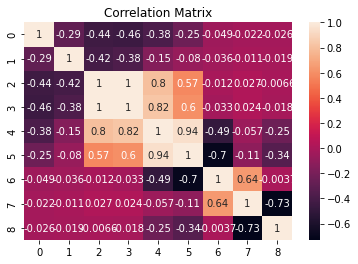

In [324]:
#Correlation heat map
correlation_matrix = principal_components.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

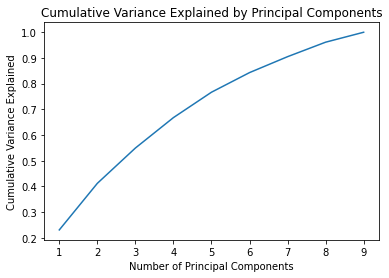

In [43]:
#For feature standardization X

pca = PCA_scratch()
pca.fit(X)

# variance explained
variance = pca.eig_values / np.sum(pca.eig_values)

cumulative_variance = np.cumsum(variance)

# Plotting cum_var
plt.plot(range(1, len(variance)+1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


##Bonus

Because we consider Naive_Bayes we consider that Covariance matrix = 0 for(i not equal to j)
EigenValues are the std , so we can directly take PCA descending_sorted wrt values of std

In [55]:
cov = np.cov(X_unfe.T)
std = np.sqrt(np.diag(cov))
eigen_vecs = []
for i in std:
    eigen_vec = np.linalg.inv(cov - i * np.identity(cov.shape[0])) @ np.ones((cov.shape[0], 1))
    eigen_vecs.append(eigen_vec)

eigen_vecs = (np.array(eigen_vecs).T).reshape(cov.shape[0], cov.shape[0])
eigen_val = std ** 2
des_sort_index = np.argsort(eigen_val)[::-1]

principal_components = X_unfe @ eigen_vecs[:, des_sort_index]


#split
X_train_PC, X_test_PC, y_train_PC, y_test_PC = train_test_split(principal_components, y, test_size=0.35, stratify=y, random_state=42)

svm.fit(X_train_PC, y_train_PC)
svm_pred = svm.predict(X_test_PC)

random.fit(X_train_PC, y_train_PC)
random_pred = random.predict(X_test_PC)

knn.fit(X_train_PC, y_train_PC)
knn_pred = knn.predict(X_test_PC)

# Accuracy
svm_acc = accuracy_score(y_test_PC, svm_pred)
random_acc = accuracy_score(y_test_PC, random_pred)
knn_acc = accuracy_score(y_test_PC, knn_pred)

# Precision
svm_prec = precision_score(y_test_PC, svm_pred, average='weighted')
random_prec = precision_score(y_test_PC, random_pred, average='weighted')
knn_prec = precision_score(y_test_PC, knn_pred, average='weighted')

# Recall
svm_recall = recall_score(y_test_PC, svm_pred, average='weighted')
random_recall = recall_score(y_test_PC, random_pred, average='weighted')
knn_recall = recall_score(y_test_PC, knn_pred, average='weighted')

# F1-score
svm_f1 = f1_score(y_test_PC, svm_pred, average='weighted')
random_f1 = f1_score(y_test_PC, random_pred, average='weighted')
knn_f1 = f1_score(y_test_PC, knn_pred, average='weighted')

print("Accuracy:")
print("SVM:", svm_acc)
print("Random Forest:", random_acc)
print("KNN:", knn_acc)
print()

print("Precision:")
print("SVM:", svm_prec)
print("Random Forest:", random_prec)
print("KNN:", knn_prec)
print()

print("Recall:")
print("SVM:", svm_recall)
print("Random Forest:", random_recall)
print("KNN:", knn_recall)
print()

print("F1-score:")
print("SVM:", svm_f1)
print("Random Forest:", random_f1)
print("KNN:", knn_f1)



Accuracy:
SVM: 0.7686274509803922
Random Forest: 0.8627450980392157
KNN: 0.796078431372549

Precision:
SVM: 0.5907881584006152
Random Forest: 0.8536705503457421
KNN: 0.7705403572861749

Recall:
SVM: 0.7686274509803922
Random Forest: 0.8627450980392157
KNN: 0.796078431372549

F1-score:
SVM: 0.6680753010738664
Random Forest: 0.8561605179308049
KNN: 0.7719292547937051


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We cannot do the same as above for Standard featurised X, as it has all std for every column=1, basically cov is a Identity matrix, so its eigenvectors are infinite

#Question 2

##Initials

In [295]:
if os.path.exists('wine.data'):
    print("Already Present")
else:
    os.system("wget https://www.dropbox.com/s/gjcip1wr3hiciqj/wine.data")

Already Present


In [296]:
features = ['Type of Wine','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [297]:
df=pd.read_csv("wine.data",names=features)

In [298]:
df

,Type of Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [299]:
#df to X,y
X=df.drop(['Type of Wine'],axis=1)
y=df['Type of Wine']

In [300]:
df.dtypes

Type of Wine                      int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [301]:
df.describe()

,Type of Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [302]:
#Normalise
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [303]:
preservedX=X
preservedy=y

##Part 1

In [323]:
import numpy as np
from scipy.stats import multivariate_normal

class LDA_scratch:
    def __init__(self):
        self.eigen_val = None
        self.eigen_vec = None
        self.SB = None
        self.SW = None
        self.class_mean = {}
        self.des_sorted_ind=None
        self.num_feature=None
        self.selected_num_features_cnt=None
        self.X_transformed=None
        self.class_prob = None
        self.classes=None
    
    def fit(self, X, y, auto_selector_based_on_percentage_var=None):
        self.num_feature = X.shape[1]
        classes = np.unique(y)
        self.classes=classes
        cls_mean = {}
        for classname in classes:
            cls_mean[classname] = np.mean(X[y == classname], axis=0)
        self.class_mean = cls_mean

        # self.between_class(X)
        # self.within_class(X)
        self.calculate_scatter_matrices(X,y)
        # print("HI")
        
        self.eigen_val, self.eigen_vec = np.linalg.eig(np.linalg.inv(self.SW).dot(self.SB))
        des_sort_ind = np.argsort(self.eigen_val)[::-1]
        self.des_sorted_ind = des_sort_ind
        self.eigen_val = self.eigen_val[des_sort_ind]
        self.eigen_vec = self.eigen_vec[:, des_sort_ind]
        # print(self.eigen_val)
        # print(self.eigen_vec)
        # print(self.eigen_val.shape)
        # print(self.eigen_vec.shape)

        self.auto_select_var(X,auto_selector_based_on_percentage_var)
        self.transform(X,y)
        # self.calculate_class_prob(self.X_transformed)

    def calculate_scatter_matrices(self, X, y):
        classes = np.unique(y)
        # Within class scatter matrix:
        self.SW = np.zeros((self.num_feature, self.num_feature))
        for classname in classes:
            X_perclass = X[y == classname]
            self.SW += (len(X_perclass) - 1) * np.cov(X_perclass.T).real.astype(np.float64)

        # Between class scatter:
        # SB = sum{ n_samples_for_class * (mean_for_class - total_mean)^2 }
        total_mean = np.mean(X, axis=0)
        self.SB = np.zeros((self.num_feature, self.num_feature))
        for classname in classes:
            X_perclass = X[y == classname]
            _mean = np.mean(X_perclass, axis=0)

            self.SB = self.SB.astype(np.float64)
            _mean = _mean.astype(np.float64)
            total_mean = total_mean.astype(np.float64)
            self.SB += len(X_perclass) * (_mean - total_mean).dot((_mean - total_mean).T)


    def auto_select_var(self,X,auto_selector_based_on_percentage_var=None):
        cumsum = np.cumsum(self.eigen_val) / np.sum(self.eigen_val)
        if auto_selector_based_on_percentage_var:
            num_components = np.argmax(cumsum >= auto_selector_based_on_percentage_var) + 1
        else:
            num_components = auto_selector_based_on_percentage_var
        self.selected_num_features_cnt=num_components
        self.W = self.eigen_vec[:, :num_components]


    def transform(self, X, y):
        A = np.linalg.inv(self.SW).dot(self.SB)
        eigenvalues, eigenvectors = np.linalg.eigh(A)

        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:self.selected_num_features_cnt]
        eigenvectors = eigenvectors[:, idx][:, :self.selected_num_features_cnt]

        X_transformed = X.dot(eigenvectors)
        self.eigen_val =eigenvalues
        self.eigen_vec = eigenvectors
        self.X_transformed=X_transformed
        return X_transformed

    def predict(self, X, n_components):
        X_transformed = X.dot(self.eigen_vec[:,:n_components])
        y_pred = []
        for row in X_transformed:
            distances = []
            for classname, mean_of_classname in self.class_mean.items():
                distances.append((np.linalg.norm(row - mean_of_classname), classname))
            y_pred.append(min(distances)[1])
            # print(min(distances)[1])
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X, n_components=self.W.shape[1])
        return np.average(y_pred == y)

    def calculate_class_prob(self, X):
        class_prob = np.zeros((X.shape[0], len(self.class_mean)))
        for i, row in enumerate(X):
            for j, (_, mean_of_classname) in enumerate(self.class_mean.items()):
                cov = np.cov((self.X_transformed[self.classes == list(self.class_mean.keys())[j]]).T)
                class_prob[i, j] = multivariate_normal(mean_of_classname, cov).pdf(self.X_transformed[i])
        return class_prob




In [274]:
def scratch_cross_val_score(estimator, X, y, cv=5):
    scores = []
    fold_size = len(X) // cv
    for i in range(cv):
        # splitting
        start_idx = i * fold_size
        end_idx = start_idx + fold_size
        X_train, y_train = np.concatenate((X[:start_idx], X[end_idx:])), np.concatenate((y[:start_idx], y[end_idx:]))
        X_test, y_test = X[start_idx:end_idx], y[start_idx:end_idx]
        
        # fitting
        estimator.fit(X_train, y_train)
        scores.append(estimator.score(X_test,y_test))
        # print(scores[i])

    mean_score = np.mean(scores)
    return mean_score


##Part 2

Selected_Feature From Most important to least important oredering
Malic acid
Ash
Magnesium
Total phenols
Hue
OD280/OD315 of diluted wines
Proline
Proanthocyanins
Color intensity
Flavanoids
Nonflavanoid phenols
Alcalinity of ash
Alcohol


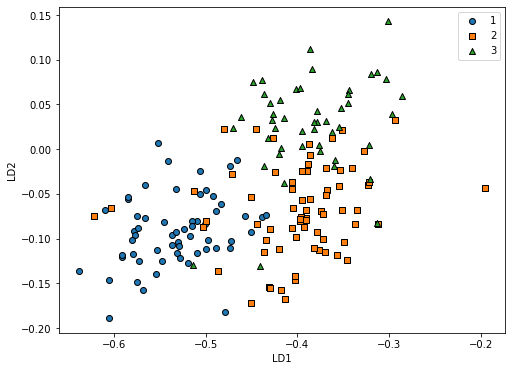

In [193]:
import numpy as np
import matplotlib.pyplot as plt

variances = np.arange(0.1, 2.1, 0.1)
scores = []
for var in variances:
    lda = LDA_scratch()
    X_scaled = X * np.sqrt(var)
    lda.fit(X_scaled, y)
    X_scaled_transformed = lda.X_transformed
    # print(X.shape)
    # print("SIZER",X_scaled_transformed.shape)
    score = scratch_cross_val_score(lda, X_scaled_transformed, y, cv=5).mean()
    scores.append(score)
    
# Identify features with high impact on classification task
selected_variance = variances[np.argmax(scores)]
X_scaled = X * np.sqrt(selected_variance)
lda = LDA_scratch()
lda.fit(X_scaled, y)
X_scaled_transformed = lda.X_transformed

selected_features = [features[i+1] for i in lda.des_sorted_ind]  # Select the most important features && removing y i.e feature[0]
print("Selected_Feature From Most important to least important oredering")
for i in selected_features:
    print(i)


# Visualisation
fig, ax = plt.subplots(figsize=(8, 6))
markers = ['o', 's', '^', 'x', 'p', '*', 'h', 'D', '<', '>']
for i, label in enumerate(np.unique(y)):
    ax.scatter(X_scaled_transformed[y==label, 0], X_scaled_transformed[y==label, 1],
               label=label, marker=markers[i], edgecolors='k')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.legend()
plt.show()


##Part 3

In [328]:
from sklearn.linear_model import LogisticRegression

pca = PCA(8)
X_pca = pca.fit_transform(X)

lda = LDA_scratch()
X_lda = lda.fit(X, y)

X_lda_transformed = lda.X_transformed

#PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2,random_state=41)

#LDA-transformed data
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda_transformed, y, test_size=0.2,random_state=43)

#KNN on PCA-transformed data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca_knn = knn_pca.predict(X_test_pca)
accuracy_pca_knn = accuracy_score(y_test_pca, y_pred_pca_knn)

#Random Forest on PCA-transformed data
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca_rf = rf_pca.predict(X_test_pca)
accuracy_pca_rf = accuracy_score(y_test_pca, y_pred_pca_rf)

#KNN on LDA-transformed data
knn_lda = KNeighborsClassifier()
knn_lda.fit(X_train_lda, y_train_lda)
y_pred_lda_knn = knn_lda.predict(X_test_lda)
accuracy_lda_knn = accuracy_score(y_test_lda, y_pred_lda_knn)

#Random Forest on LDA-transformed data
rf_lda = RandomForestClassifier()
rf_lda.fit(X_train_lda, y_train_lda)
y_pred_lda_rf = rf_lda.predict(X_test_lda)
accuracy_lda_rf = accuracy_score(y_test_lda, y_pred_lda_rf)

print("PCA - KNN accuracy:", accuracy_pca_knn)
print("PCA - Random Forest accuracy:", accuracy_pca_rf)
print("LDA - KNN accuracy:", accuracy_lda_knn)
print("LDA - Random Forest accuracy:", accuracy_lda_rf)


PCA - KNN accuracy: 0.8611111111111112
PCA - Random Forest accuracy: 0.9444444444444444
LDA - KNN accuracy: 0.9166666666666666
LDA - Random Forest accuracy: 0.9722222222222222


##Part 4

In [329]:
from prettytable import PrettyTable

# Create table
table = PrettyTable()
table.field_names = ["Reduction Technique", "Classifier", "Accuracy"]

table.add_row(["PCA", "KNN", accuracy_pca_knn])
table.add_row(["PCA", "Random Forest", accuracy_pca_rf])
table.add_row(["LDA", "KNN", accuracy_lda_knn])
table.add_row(["LDA", "Random Forest", accuracy_lda_rf])

print(table)


+---------------------+---------------+--------------------+
| Reduction Technique |   Classifier  |      Accuracy      |
+---------------------+---------------+--------------------+
|         PCA         |      KNN      | 0.8611111111111112 |
|         PCA         | Random Forest | 0.9444444444444444 |
|         LDA         |      KNN      | 0.9166666666666666 |
|         LDA         | Random Forest | 0.9722222222222222 |
+---------------------+---------------+--------------------+


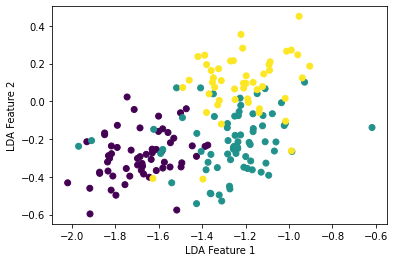

In [230]:
plt.scatter(X_lda_transformed[:, 0], X_lda_transformed[:, 1], c=y)
plt.xlabel('LDA Feature 1')
plt.ylabel('LDA Feature 2')
plt.show()

##Part 5

In [309]:
X=preservedX
y=preservedy

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [321]:
lda=LDA_scratch()
lda.fit(X,y)

print(scratch_cross_val_score(lda,X,y,5))

0.4057142857142857


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

class_pairs = [(i,j) for i in range(3) for j in range(i+1,3)]
for pair in class_pairs:
    c1, c2 = pair
    idx = np.logical_or(y_train == c1, y_train == c2)
    X_pair = X_train[idx]
    y_pair = y_train[idx]
    y_pair[y_pair == c1] = 0
    y_pair[y_pair == c2] = 1

    lda_model = LDA_scratch()
    lda_model.fit(X_pair, y_pair)

    y_proba = lda_model.calculate_class_prob(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='Class %d vs %d (AUC = %0.2f)' % (c1, c2, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()